# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the median for each of the 4 size columns
*  calculate the proportion of each column that are on or above median that are of a species (ie proportion of petal-lengths on or above median that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, median and upper and lower quartile values in each of the columns


In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

def display_df(df):
  print(iris_data.info())
#Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included  
  display(iris_data.head(10))
  display(iris_data.tail(10))
display_df(iris_data)

def find_unique_values(df,column):
  df_unique=df[column].unique()
  count_values=df[column].value_counts()
  return df_unique,count_values

iris_data_unique,count_values=find_unique_values(iris_data,'species')
print("There are ", len(iris_data_unique),"unique species")
print(iris_data_unique)

#Find out the maximum, minimum, median and upper and lower quartile values in each of the columns
print(iris_data.describe())
#Get the stats by specie
print(iris_data.groupby("species").describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


There are  3 unique species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
                sepal-length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
I

### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [3]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train, test = train_test_split(iris_data, test_size=0.30)
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.058095,3.783810,1.214286
std,0.821615,0.439795,1.757354,0.768043
min,4.400000,2.200000,1.200000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [4]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def clean_df(df):
  new_df=df.dropna()
  return new_df
test_clean=clean_df(test)
train_clean=clean_df(train)
display(train_clean.describe())

def calc_mean(df,column):
  try:
    mean=df[column].mean(axis=0)
    return mean
  except:
    return "This is not a number"

meanSL=calc_mean(train_clean,"sepal-length")
meanSW=calc_mean(train_clean,"sepal-width")		
meanPL=calc_mean(train_clean,"petal-length")
meanPW=calc_mean(train_clean,"petal-width")
print("The mean of Sepal-Length is: ",meanSL)
print("The mean of Sepal-width is: ",meanSW)
print("The mean of Petal-Length is: ",meanPL)
print("The mean of Petal-width is: ",meanPW)

def encode(df,**kwds):
  #define the keywords
  median=kwds["mean"]
  key=kwds["column"]
  if df[key] >= median:
    return 1
  else:
    return 0

col_names=list(train_clean.keys())
col_names.remove("species")
for i in col_names:
  train_clean['encoded_'+i] = train_clean.apply(encode, axis=1, column=i, mean=train_clean[i].mean())

#Create a new dataframe with the numeric columns encoded
new_train=train_clean.drop(['sepal-length', 'sepal-width','petal-length','petal-width'], axis = 1)
print(new_train.head(10))

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.058095,3.783810,1.214286
std,0.821615,0.439795,1.757354,0.768043
min,4.400000,2.200000,1.200000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


The mean of Sepal-Length is:  5.873333333333333
The mean of Sepal-width is:  3.058095238095238
The mean of Petal-Length is:  3.7838095238095226
The mean of Petal-width is:  1.2142857142857149
             species  encoded_sepal-length  encoded_sepal-width  \
46       Iris-setosa                     0                    1   
103   Iris-virginica                     1                    0   
113   Iris-virginica                     0                    0   
81   Iris-versicolor                     0                    0   
94   Iris-versicolor                     0                    0   
56   Iris-versicolor                     1                    1   
58   Iris-versicolor                     1                    0   
126   Iris-virginica                     1                    0   
121   Iris-virginica                     0                    0   
52   Iris-versicolor                     1                    1   

     encoded_petal-length  encoded_petal-width  
46                   

### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the median that are NOT Iris-virginica.  Calculate these in the same way



In [5]:
# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica
def prop_above_mean(df,specie,col):
  prop_spec_above = df[(df[col]== 1) & (df['species']==specie)][col].count()/df[(df[col]== 1)][col].count()*100
  return prop_spec_above

#Calculate prop of Iris Virginica
def calculate_proportions_specie_above_mean(df,specie):
  prop_above_SL=prop_above_mean(df,specie,"encoded_sepal-length")
  prop_above_SW=prop_above_mean(df,specie,"encoded_sepal-width")
  prop_above_PL=prop_above_mean(df,specie,"encoded_petal-length")
  prop_above_PW=prop_above_mean(df,specie,"encoded_petal-width")

  prop_above_SL_NO_specie=100-prop_above_SL
  prop_above_SW_NO_specie=100-prop_above_SW
  prop_above_PL_NO_specie=100-prop_above_PL
  prop_above_PW_NO_specie=100-prop_above_PW
  return prop_above_SL,prop_above_SW,prop_above_PL,prop_above_PW

specie="Iris-virginica"
Iris_virginica_prop_above_SL,Iris_virginica_prop_above_SW,Iris_virginica_prop_above_PL,Iris_virginica_prop_above_PW=calculate_proportions_specie_above_mean(new_train,specie)
print("The proportion of", specie," above the mean Sepal-Length is: ",Iris_virginica_prop_above_SL)
print("The proportion of", specie,"  above the mean Sepal-Width is: ",Iris_virginica_prop_above_SW)
print("The proportion of", specie," above the mean Petal-Length is: ",Iris_virginica_prop_above_PL)
print("The proportion of", specie,"  above the mean Petal-Width is: ",Iris_virginica_prop_above_PW)


The proportion of Iris-virginica  above the mean Sepal-Length is:  60.78431372549019
The proportion of Iris-virginica   above the mean Sepal-Width is:  28.57142857142857
The proportion of Iris-virginica  above the mean Petal-Length is:  53.84615384615385
The proportion of Iris-virginica   above the mean Petal-Width is:  58.333333333333336


### Exercise 5 - Calculate the proportion of each column where the value is below median that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [6]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica
def prop_below_mean(df,specie,col):
  prop_spec_below = df[(df[col]== 0) & (df['species']==specie)][col].count()/df[(df[col]== 0)][col].count()*100
  return prop_spec_below

#Calculate prop of Iris Virginica
def calculate_proportions_specie_below_mean(df,specie):
  prop_below_SL=prop_below_mean(df,specie,"encoded_sepal-length")
  prop_below_SW=prop_below_mean(df,specie,"encoded_sepal-width")
  prop_below_PL=prop_below_mean(df,specie,"encoded_petal-length")
  prop_below_PW=prop_below_mean(df,specie,"encoded_petal-width")
  return prop_below_SL,prop_below_SW,prop_below_PL,prop_below_PW

specie="Iris-virginica"
Iris_virginica_prop_below_SL,Iris_virginica_prop_below_SW,Iris_virginica_prop_below_PL,Iris_virginica_prop_below_PW=calculate_proportions_specie_below_mean(new_train,specie)
print("The proportion of", specie," below the mean Sepal-Length is: ",Iris_virginica_prop_below_SL)
print("The proportion of", specie,"  below the mean Sepal-Width is: ",Iris_virginica_prop_below_SW)
print("The proportion of", specie," below the mean Petal-Length is: ",Iris_virginica_prop_below_PL)
print("The proportion of", specie,"  below the mean Petal-Width is: ",Iris_virginica_prop_below_PW)



The proportion of Iris-virginica  below the mean Sepal-Length is:  7.4074074074074066
The proportion of Iris-virginica   below the mean Sepal-Width is:  37.5
The proportion of Iris-virginica  below the mean Petal-Length is:  0.0
The proportion of Iris-virginica   below the mean Petal-Width is:  0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [7]:
# calculate the proportion of results where the value is on or above mean that are of a certain specie
def prop_above_mean(df,specie,col):
  prop_spec_above = df[(df[col]== 1) & (df['species']==specie)][col].count()/df[(df[col]== 1)][col].count()*100
  return prop_spec_above

#Calculate prop of a specie above the mean
def calculate_proportions_specie_above_mean(df,specie):
  prop_above_SL=prop_above_mean(df,specie,"encoded_sepal-length")
  prop_above_SW=prop_above_mean(df,specie,"encoded_sepal-width")
  prop_above_PL=prop_above_mean(df,specie,"encoded_petal-length")
  prop_above_PW=prop_above_mean(df,specie,"encoded_petal-width")
  return prop_above_SL,prop_above_SW,prop_above_PL,prop_above_PW

# calculate the proportion of results where the value is below median that are of the specie
def prop_below_mean(df,specie,col):
  prop_spec_below = df[(df[col]== 0) & (df['species']==specie)][col].count()/df[(df[col]== 0)][col].count()*100
  return prop_spec_below

#Calculate prop of a specie below the mean
def calculate_proportions_specie_below_mean(df,specie):
  prop_below_SL=prop_below_mean(df,specie,"encoded_sepal-length")
  prop_below_SW=prop_below_mean(df,specie,"encoded_sepal-width")
  prop_below_PL=prop_below_mean(df,specie,"encoded_petal-length")
  prop_below_PW=prop_below_mean(df,specie,"encoded_petal-width")
  return prop_below_SL,prop_below_SW,prop_below_PL,prop_below_PW

#Analyse Iris-versicolor specie
specie="Iris-versicolor"
#Calculate the proportions of Iris-versicolor above the mean values
Iris_versicolor_prop_above_SL,Iris_versicolor_prop_above_SW,Iris_versicolor_prop_above_PL,Iris_versicolor_prop_above_PW=calculate_proportions_specie_above_mean(new_train,specie)
print("The proportion of", specie," above the mean Sepal-Length is: ",Iris_versicolor_prop_above_SL)
print("The proportion of", specie,"  above the mean Sepal-Width is: ",Iris_versicolor_prop_above_SW)
print("The proportion of", specie," above the mean Petal-Length is: ",Iris_versicolor_prop_above_PL)
print("The proportion of", specie,"  above the mean Petal-Width is: ",Iris_versicolor_prop_above_PW)

#Calculate the proportions of Iris-versicolor below the mean values
Iris_versicolor_prop_below_SL,Iris_versicolor_prop_below_SW,Iris_versicolor_prop_below_PL,Iris_versicolor_prop_below_PW=calculate_proportions_specie_below_mean(new_train,specie)
print("The proportion of", specie," below the mean Sepal-Length is: ",Iris_versicolor_prop_below_SL)
print("The proportion of", specie,"  below the mean Sepal-Width is: ",Iris_versicolor_prop_below_SW)
print("The proportion of", specie," below the mean Petal-Length is: ",Iris_versicolor_prop_below_PL)
print("The proportion of", specie,"  below the mean Petal-Width is: ",Iris_versicolor_prop_below_PW)

#Analyse Iris-setosa  specie
specie="Iris-setosa"
#Calculate the proportions of Iris-setosa above the mean values
Iris_setosa_prop_above_SL,Iris_setosa_prop_above_SW,Iris_setosa_prop_above_PL,Iris_setosa_prop_above_PW=calculate_proportions_specie_above_mean(new_train,specie)
print("The proportion of", specie," above the mean Sepal-Length is: ",Iris_setosa_prop_above_SL)
print("The proportion of", specie,"  above the mean Sepal-Width is: ",Iris_setosa_prop_above_SW)
print("The proportion of", specie," above the mean Petal-Length is: ",Iris_setosa_prop_above_PL)
print("The proportion of", specie,"  above the mean Petal-Width is: ",Iris_setosa_prop_above_PW)

#Calculate the proportions of Iris-setosa below the mean values
Iris_setosa_prop_below_SL,Iris_setosa_prop_below_SW,Iris_setosa_prop_below_PL,Iris_setosa_prop_below_PW=calculate_proportions_specie_below_mean(new_train,specie)
print("The proportion of", specie," below the mean Sepal-Length is: ",Iris_setosa_prop_below_SL)
print("The proportion of", specie,"  below the mean Sepal-Width is: ",Iris_setosa_prop_below_SW)
print("The proportion of", specie," below the mean Petal-Length is: ",Iris_setosa_prop_below_PL)
print("The proportion of", specie,"  below the mean Petal-Width is: ",Iris_setosa_prop_below_PW)


The proportion of Iris-versicolor  above the mean Sepal-Length is:  39.21568627450981
The proportion of Iris-versicolor   above the mean Sepal-Width is:  12.244897959183673
The proportion of Iris-versicolor  above the mean Petal-Length is:  46.15384615384615
The proportion of Iris-versicolor   above the mean Petal-Width is:  41.66666666666667
The proportion of Iris-versicolor  below the mean Sepal-Length is:  29.629629629629626
The proportion of Iris-versicolor   below the mean Sepal-Width is:  53.57142857142857
The proportion of Iris-versicolor  below the mean Petal-Length is:  15.0
The proportion of Iris-versicolor   below the mean Petal-Width is:  24.444444444444443
The proportion of Iris-setosa  above the mean Sepal-Length is:  0.0
The proportion of Iris-setosa   above the mean Sepal-Width is:  59.183673469387756
The proportion of Iris-setosa  above the mean Petal-Length is:  0.0
The proportion of Iris-setosa   above the mean Petal-Width is:  0.0
The proportion of Iris-setosa  belo

### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [8]:
#Create lists and then a df
species_list = ['Iris-viriginica','Iris-setosa', 'Iris-versicolor']
above_mean_SL = [Iris_virginica_prop_above_SL, Iris_versicolor_prop_above_SL, Iris_setosa_prop_above_SL]
above_mean_SW = [Iris_virginica_prop_above_SW, Iris_versicolor_prop_above_SW, Iris_setosa_prop_above_SW]
above_mean_PL = [Iris_virginica_prop_above_PL, Iris_versicolor_prop_above_PL, Iris_setosa_prop_above_PL]
above_mean_PW = [Iris_virginica_prop_above_PW, Iris_versicolor_prop_above_PW, Iris_setosa_prop_above_PW]
below_mean_SL = [Iris_virginica_prop_below_SL, Iris_versicolor_prop_below_SL, Iris_setosa_prop_below_SL]
below_mean_SW = [Iris_virginica_prop_below_SW, Iris_versicolor_prop_below_SW, Iris_setosa_prop_below_SW]
below_mean_PL = [Iris_virginica_prop_below_PL, Iris_versicolor_prop_below_PL, Iris_setosa_prop_below_PL]
below_mean_PW = [Iris_virginica_prop_below_PW, Iris_versicolor_prop_below_PW, Iris_setosa_prop_below_PW]

df_iris = pd.DataFrame(list(zip(species_list, above_mean_SL, above_mean_SW, above_mean_PL, above_mean_PW, below_mean_SL, below_mean_SW, below_mean_PL, below_mean_PW)), columns =['species', 'sepal_length_above_mean','sepal_width_above_mean','petal_length_above_mean','petal_width_above_mean','sepal_length_below_mean','sepal_width_below_mean','petal_length_below_mean','petal_width_below_mean'])
df_iris



,species,sepal_length_above_mean,sepal_width_above_mean,petal_length_above_mean,petal_width_above_mean,sepal_length_below_mean,sepal_width_below_mean,petal_length_below_mean,petal_width_below_mean
0,Iris-viriginica,60.784314,28.571429,53.846154,58.333333,7.407407,37.500000,0.0,0.000000
1,Iris-setosa,39.215686,12.244898,46.153846,41.666667,29.629630,53.571429,15.0,24.444444
2,Iris-versicolor,0.000000,59.183673,0.000000,0.000000,62.962963,8.928571,85.0,75.555556



### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




In [9]:
def get_species(df):
    if df['petal-width'] == 0:
        return None
        if df['petal-length'] == 0:
            return None
            if df['sepal-length'] == 0:
                return None
    return 'Iris-virginica' 

correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.3333333333333333


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


What do you notice? (write your answer here)

In [10]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def clean_df(df):
  new_df=df.dropna()
  return new_df
test_clean=clean_df(test)
train_clean=clean_df(train)
display(train_clean.describe())

def calc_median(df,column):
  try:
    mean=df[column].median(axis=0)
    return mean
  except:
    return "This is not a number"

meanSL=calc_median(train_clean,"sepal-length")
meanSW=calc_median(train_clean,"sepal-width")		
meanPL=calc_median(train_clean,"petal-length")
meanPW=calc_median(train_clean,"petal-width")
print("The mean of Sepal-Length is: ",meanSL)
print("The mean of Sepal-width is: ",meanSW)
print("The mean of Petal-Length is: ",meanPL)
print("The mean of Petal-width is: ",meanPW)

def encode(df,**kwds):
  #define the keywords
  median=kwds["mean"]
  key=kwds["column"]
  if df[key] >= median:
    return 1
  else:
    return 0

col_names=list(train_clean.keys())
col_names.remove("species")
for i in col_names:
  train_clean['encoded_'+i] = train_clean.apply(encode, axis=1, column=i, mean=train_clean[i].median())

#Create a new dataframe with the numeric columns encoded
new_train=train_clean.drop(['sepal-length', 'sepal-width','petal-length','petal-width'], axis = 1)
print(new_train.head(10))

# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica
def prop_above_mean(df,specie,col):
  prop_spec_above = df[(df[col]== 1) & (df['species']==specie)][col].count()/df[(df[col]== 1)][col].count()*100
  return prop_spec_above

#Calculate prop of Iris Virginica
def calculate_proportions_specie_above_mean(df,specie):
  prop_above_SL=prop_above_mean(df,specie,"encoded_sepal-length")
  prop_above_SW=prop_above_mean(df,specie,"encoded_sepal-width")
  prop_above_PL=prop_above_mean(df,specie,"encoded_petal-length")
  prop_above_PW=prop_above_mean(df,specie,"encoded_petal-width")

  prop_above_SL_NO_specie=100-prop_above_SL
  prop_above_SW_NO_specie=100-prop_above_SW
  prop_above_PL_NO_specie=100-prop_above_PL
  prop_above_PW_NO_specie=100-prop_above_PW
  return prop_above_SL,prop_above_SW,prop_above_PL,prop_above_PW

specie="Iris-virginica"
Iris_virginica_prop_above_SL,Iris_virginica_prop_above_SW,Iris_virginica_prop_above_PL,Iris_virginica_prop_above_PW=calculate_proportions_specie_above_mean(new_train,specie)
print("The proportion of", specie," above the mean Sepal-Length is: ",Iris_virginica_prop_above_SL)
print("The proportion of", specie,"  above the mean Sepal-Width is: ",Iris_virginica_prop_above_SW)
print("The proportion of", specie," above the mean Petal-Length is: ",Iris_virginica_prop_above_PL)
print("The proportion of", specie,"  above the mean Petal-Width is: ",Iris_virginica_prop_above_PW)

Iris_virginica_prop_below_SL,Iris_virginica_prop_below_SW,Iris_virginica_prop_below_PL,Iris_virginica_prop_below_PW=calculate_proportions_specie_below_mean(new_train,specie)
print("The proportion of", specie," below the mean Sepal-Length is: ",Iris_virginica_prop_below_SL)
print("The proportion of", specie,"  below the mean Sepal-Width is: ",Iris_virginica_prop_below_SW)
print("The proportion of", specie," below the mean Petal-Length is: ",Iris_virginica_prop_below_PL)
print("The proportion of", specie,"  below the mean Petal-Width is: ",Iris_virginica_prop_below_PW)

#Analyse Iris-versicolor specie
specie="Iris-versicolor"
#Calculate the proportions of Iris-versicolor above the mean values
Iris_versicolor_prop_above_SL,Iris_versicolor_prop_above_SW,Iris_versicolor_prop_above_PL,Iris_versicolor_prop_above_PW=calculate_proportions_specie_above_mean(new_train,specie)
print("The proportion of", specie," above the mean Sepal-Length is: ",Iris_versicolor_prop_above_SL)
print("The proportion of", specie,"  above the mean Sepal-Width is: ",Iris_versicolor_prop_above_SW)
print("The proportion of", specie," above the mean Petal-Length is: ",Iris_versicolor_prop_above_PL)
print("The proportion of", specie,"  above the mean Petal-Width is: ",Iris_versicolor_prop_above_PW)

#Calculate the proportions of Iris-versicolor below the mean values
Iris_versicolor_prop_below_SL,Iris_versicolor_prop_below_SW,Iris_versicolor_prop_below_PL,Iris_versicolor_prop_below_PW=calculate_proportions_specie_below_mean(new_train,specie)
print("The proportion of", specie," below the mean Sepal-Length is: ",Iris_versicolor_prop_below_SL)
print("The proportion of", specie,"  below the mean Sepal-Width is: ",Iris_versicolor_prop_below_SW)
print("The proportion of", specie," below the mean Petal-Length is: ",Iris_versicolor_prop_below_PL)
print("The proportion of", specie,"  below the mean Petal-Width is: ",Iris_versicolor_prop_below_PW)

#Analyse Iris-setosa  specie
specie="Iris-setosa"
#Calculate the proportions of Iris-setosa above the mean values
Iris_setosa_prop_above_SL,Iris_setosa_prop_above_SW,Iris_setosa_prop_above_PL,Iris_setosa_prop_above_PW=calculate_proportions_specie_above_mean(new_train,specie)
print("The proportion of", specie," above the mean Sepal-Length is: ",Iris_setosa_prop_above_SL)
print("The proportion of", specie,"  above the mean Sepal-Width is: ",Iris_setosa_prop_above_SW)
print("The proportion of", specie," above the mean Petal-Length is: ",Iris_setosa_prop_above_PL)
print("The proportion of", specie,"  above the mean Petal-Width is: ",Iris_setosa_prop_above_PW)

#Calculate the proportions of Iris-setosa below the mean values
Iris_setosa_prop_below_SL,Iris_setosa_prop_below_SW,Iris_setosa_prop_below_PL,Iris_setosa_prop_below_PW=calculate_proportions_specie_below_mean(new_train,specie)
print("The proportion of", specie," below the mean Sepal-Length is: ",Iris_setosa_prop_below_SL)
print("The proportion of", specie,"  below the mean Sepal-Width is: ",Iris_setosa_prop_below_SW)
print("The proportion of", specie," below the mean Petal-Length is: ",Iris_setosa_prop_below_PL)
print("The proportion of", specie,"  below the mean Petal-Width is: ",Iris_setosa_prop_below_PW)

#Create lists and then a df
species_list = ['Iris-viriginica','Iris-setosa', 'Iris-versicolor']
above_mean_SL = [Iris_virginica_prop_above_SL, Iris_versicolor_prop_above_SL, Iris_setosa_prop_above_SL]
above_mean_SW = [Iris_virginica_prop_above_SW, Iris_versicolor_prop_above_SW, Iris_setosa_prop_above_SW]
above_mean_PL = [Iris_virginica_prop_above_PL, Iris_versicolor_prop_above_PL, Iris_setosa_prop_above_PL]
above_mean_PW = [Iris_virginica_prop_above_PW, Iris_versicolor_prop_above_PW, Iris_setosa_prop_above_PW]
below_mean_SL = [Iris_virginica_prop_below_SL, Iris_versicolor_prop_below_SL, Iris_setosa_prop_below_SL]
below_mean_SW = [Iris_virginica_prop_below_SW, Iris_versicolor_prop_below_SW, Iris_setosa_prop_below_SW]
below_mean_PL = [Iris_virginica_prop_below_PL, Iris_versicolor_prop_below_PL, Iris_setosa_prop_below_PL]
below_mean_PW = [Iris_virginica_prop_below_PW, Iris_versicolor_prop_below_PW, Iris_setosa_prop_below_PW]

df_iris = pd.DataFrame(list(zip(species_list, above_mean_SL, above_mean_SW, above_mean_PL, above_mean_PW, below_mean_SL, below_mean_SW, below_mean_PL, below_mean_PW)), columns =['species', 'sepal_length_above_mean','sepal_width_above_mean','petal_length_above_mean','petal_width_above_mean','sepal_length_below_mean','sepal_width_below_mean','petal_length_below_mean','petal_width_below_mean'])
df_iris

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.058095,3.783810,1.214286
std,0.821615,0.439795,1.757354,0.768043
min,4.400000,2.200000,1.200000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


The mean of Sepal-Length is:  5.8
The mean of Sepal-width is:  3.0
The mean of Petal-Length is:  4.4
The mean of Petal-width is:  1.3
             species  encoded_sepal-length  encoded_sepal-width  \
46       Iris-setosa                     0                    1   
103   Iris-virginica                     1                    0   
113   Iris-virginica                     0                    0   
81   Iris-versicolor                     0                    0   
94   Iris-versicolor                     0                    0   
56   Iris-versicolor                     1                    1   
58   Iris-versicolor                     1                    0   
126   Iris-virginica                     1                    0   
121   Iris-virginica                     0                    0   
52   Iris-versicolor                     1                    1   

     encoded_petal-length  encoded_petal-width  
46                      0                    0  
103                     1     

,species,sepal_length_above_mean,sepal_width_above_mean,petal_length_above_mean,petal_width_above_mean,sepal_length_below_mean,sepal_width_below_mean,petal_length_below_mean,petal_width_below_mean
0,Iris-viriginica,59.259259,29.6875,66.037736,58.333333,7.407407,37.500000,0.000000,0.000000
1,Iris-setosa,38.888889,18.7500,33.962264,41.666667,29.411765,58.536585,34.615385,24.444444
2,Iris-versicolor,1.851852,51.5625,0.000000,0.000000,64.705882,2.439024,65.384615,75.555556


### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


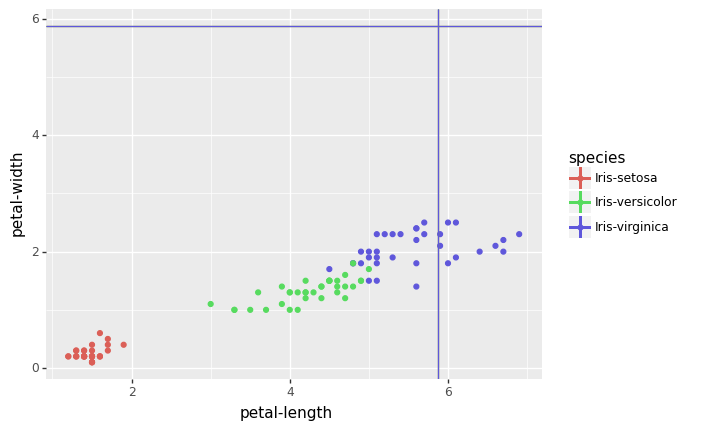

<ggplot: (8756984583661)>

In [11]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))